Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**Parametric Windows: Dolph-Chebyshev, Slepian and Kaiser-Bessel Window**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

# Parametric Windows: Dolph-Chebyshev, Slepian, Kaiser-Bessel Window

There are numerous window types, all developed for special requirements.
In the initial [DFT & Windowing](dft_windowing.ipynb) exercise and the detailed [DFT tutorial](dft_windowing_tutorial/dft_windowing_tutorial.pdf) we have learned about two very simple computable and very often used **non-parametric** windows, the Hann and the Hamming window.
Non-parametric means that by desired window length $M$, the window and its DTFT spectrum are fully determined.
In other words, if another spectral characteristics - very often we need higher spectral resolution - is asked for, then the only variable to change is $M$.

The **Hann** window is **not optimal**, since it does not use two of its potential zeros to shape the sidelobes of its DTFT spectrum.
The Hamming window introduces two additional zeros to the Hann window to reduce the level of the first sidelobe.
Note that the Hann window is still often used nowadays, not due to its non-optimum spectrum, but rather due to its simple calculation of the window signal $w[k]$ requiring only a cosine and weight of $1/2$.

So called **parametric** windows have additional parameters, that allow to meet certain constraints for a given overall design criterion.
Two of the most prominent - in fact with these we probably can manage the majority of windowing applications - are the **Dolph-Chebyshev** and the **Kaiser-Bessel** window.
These are optimum window designs.
The Kaiser-Bessel window itself can be considered as an approximation of the so called **discrete prolate spheroidal sequences** (DPSS, aka Slepian) window.

We will discuss these windows below in terms of their design criteria and the resulting additional parameter that can be set up to meet a desired constraint.
TBD...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from numpy.fft import fft, fftshift, ifft 
#from scipy.fft import fft, fftshift, ifft
from scipy.signal.windows import chebwin, kaiser, dpss
from scipy.signal import tf2zpk

## Dolph-Chebyshev Window

In [2]:
# parameter for the window
M = 64  # window length
SidelobeAttenuation = 50  # in dB

In [3]:
w = chebwin(M, at=SidelobeAttenuation, sym=True)
# note on the code from:
# https://github.com/scipy/scipy/blob/v0.19.0/scipy/signal/windows.py#L1293-L1416
#
# The tricky part here is that the analytic equations given in most textbooks
# such as e.g. R.G. Lyons (2011): "Understanding Digital Signal Processing",
# Prentice Hall, Upper Saddle River, 3rd ed., eq. (5.17)
# cannot be straightforwardly implemented due to numerical issues
# however, certain parts of the equation can be identified as Chebyshev polynomials
# (the window has its name from there) for which relations can be utilized.
# This is done in the scipy code for p[x < -1], p[np.abs(x) <= 1]

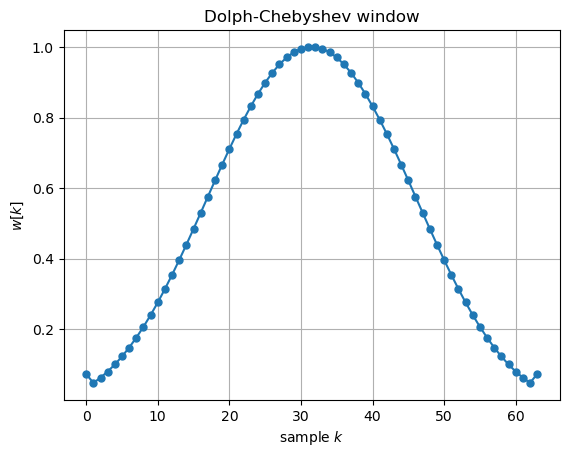

In [4]:
plt.plot(w, 'C0o-', ms=5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$w[k]$')
plt.title('Dolph-Chebyshev window')
plt.grid(True)

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/3550752041.py:6: RuntimeWarning: divide by zero encountered in log10
  Wzmax = np.max(20*np.log10(np.abs(Wz)))
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/3550752041.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Omega, 20*np.log10(np.abs(Wz))-Wzmax, 'k')
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/3550752041.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Omega-np.pi, 20*np.log10(np.abs(fftshift(Wz)))-Wzmax, 'C0')


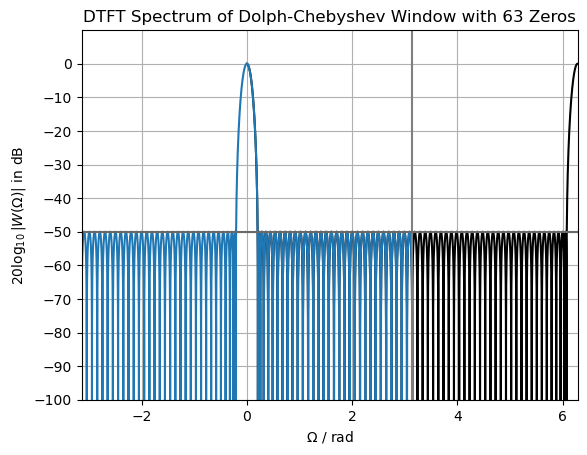

In [5]:
Nz = 2**16  # zeropadding of window -> quasi-cont resolution of W for DTFT
Omega = 2*np.pi/Nz * np.arange(Nz)
wz = np.zeros(Nz)
wz[0:M] = w
Wz = fft(wz)
Wzmax = np.max(20*np.log10(np.abs(Wz)))
plt.plot(Omega, 20*np.log10(np.abs(Wz))-Wzmax, 'k')
plt.plot(Omega-np.pi, 20*np.log10(np.abs(fftshift(Wz)))-Wzmax, 'C0')
plt.plot([np.pi, np.pi], [-120, 10], 'C7')
plt.plot([-np.pi, 2*np.pi], [-50, -50], 'dimgray')
plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r'$20 \log_{10}|W(\Omega)|$ in dB')
plt.xlim(-np.pi, 2*np.pi)
plt.ylim(-100, 10)
plt.yticks(np.arange(-100,10,10))
plt.title('DTFT Spectrum of Dolph-Chebyshev Window with %d Zeros' %(M-1))
plt.grid(True)

We might figure out the design criterion of the Dolph-Chebyshev by ourselves, when inspecting the DTFT spectrum of it.
Hint: How is the additional parameter linked to the DTFT spectrum.
Vary `M` and `SidelobeAttenuation` and check for changes.
For small `M` (to make analysis convenient) check how the zeros are placed in the spectrum to meet the design criterion.

## DPSS Window aka Slepian Window

The design criterion of the **Slepian** (also named **discrete prolate spheroidal sequences** or **digital prolate spheroidal sequences** (DPSS)) window is **maximum energy** concentration in the **main lobe** for a given mainlobe **bandwidth**.
Actually, this is what we typically ask for signal analysis, if no other specific constraints about the sidelobes positions and there levels are requested.

Recall, that the DTFT spectrum for the 'ideal world' window is the Dirac impulse (steming from the practically not feasible infinite rectangular window), so mainlobe energy concentration seems to be a very good approach to get close to it.

See

- Surendra Prasad (1982): "On an Index for Array Optimization and the Discrete Prolate Spheroidal Functions." In:
IEEE Transactions on Antennas and Propagation, vol. AP-30, no. 5, pg. 1021-1023, [DOI: 10.1109/TAP.1982.1142900](https://doi.org/10.1109/TAP.1982.1142900)

- Michael Möser (1988): "Analyse und Synthese akustischer Spektren.", Springer, Berlin, Kap. 3.2.2, [DOI: 10.1007/978-3-642-93374-5](https://doi.org/10.1007/978-3-642-93374-5)

- Julius O. Smith (2011): Spectral Audio Signal Processing, online lecture of CCRMA, Stanford University, https://ccrma.stanford.edu/~jos/sasp/Slepian_DPSS_Window.html


for treatments how to derive the Slepian window.

Challenging question:
What window type results if we ask the Slepian window to produce mainlobe bandwidth $\rightarrow 0$?
Implement a test case to approach the answer. 

In [6]:
# parameter for the window
M = 64  # window length
bw = 2*np.pi/45  # -3dB bandwidth of the main lobe in terms of digital frequency
# empirically found for the specific window length
NW = bw * M/4

For the chosen example, this Slepian window has (i) the same window length and (ii) the first sidelobe is at about -50 dB like the Dolph-Chebyshev window above.

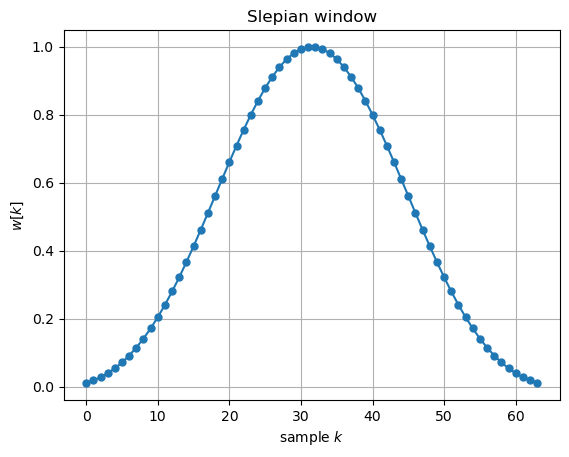

In [7]:
w = dpss(M, NW, sym=True)  # https://docs.scipy.org/doc/scipy-1.7.1/reference/generated/scipy.signal.windows.dpss.html
plt.plot(w, 'C0o-', ms=5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$w[k]$')
plt.title('Slepian window')
plt.grid(True)

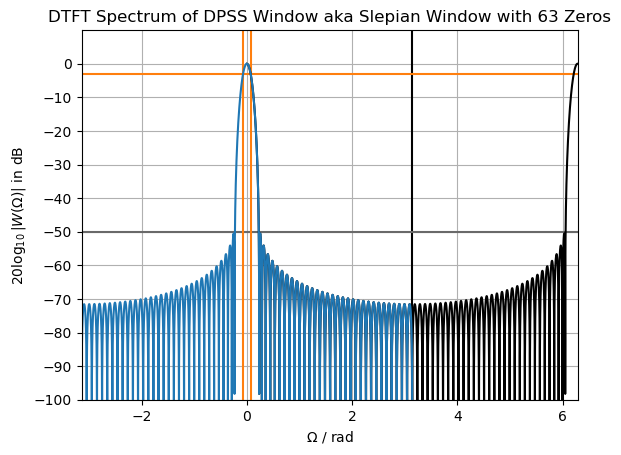

In [8]:
Nz = 2**16  # zeropadding of window -> quasi-cont resolution of W for DTFT
Omega = 2*np.pi/Nz*np.arange(Nz)
wz = np.zeros(Nz)
wz[0:M] = w
Wz = fft(wz)
Wzmax = np.max(20*np.log10(np.abs(Wz)))
plt.plot([np.pi, np.pi], [-120, 10], 'k')
plt.plot([-np.pi, 2*np.pi], [-3.01, -3.01], 'C1')
plt.plot([-np.pi, 2*np.pi], [-50, -50], 'dimgray')
plt.plot([-bw/2, -bw/2], [-120, 10], color='C1')
plt.plot([+bw/2, +bw/2], [-120, 10], color='C1')
plt.plot(Omega, 20*np.log10(np.abs(Wz))-Wzmax, 'k')
plt.plot(Omega-np.pi, 20*np.log10(np.abs(fftshift(Wz)))-Wzmax, 'C0')
plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r'$20 \log_{10}|W(\Omega)|$ in dB')
plt.xlim(-np.pi, 2*np.pi)

# zoom the main lobe
if False:
    plt.xlim(-5*bw, +5*bw)

plt.ylim(-100, 10)
plt.yticks(np.arange(-100,10,10))
plt.title('DTFT Spectrum of DPSS Window aka Slepian Window with %d Zeros' % (M-1))
plt.grid(True)

## Kaiser-Bessel Window

The Kaiser-Bessel window is an **approximation** of the Slepian window **for large window lengths** $M$, note however that they will be **never identical**.
In the days of its **invention by Kaiser** it was much easier to compute it than the discrete prolate spheroidal sequences discussed above. 
This is due to the explicit given equation for the Kaiser-Bessel window, whereas for the Slepian window an eigenwert problem for a $M/2$ matrix has to be numerically solved.
The Kaiser-Bessel window requires the [zeroth-order modified **Bessel** function of the first kind](https://dlmf.nist.gov/10.25) $I_0(\cdot)$ to calculate the window signal $w[k]$.
Thus, the given name in the DSP literature.

TBD...

For the upcoming discussion we need pole/zeros plot. So let's define a convenient plotting routine before:

In [9]:
def zplane_plot(z, p, k):
    """Plot pole/zero/gain plot of discrete-time, linear-time-invariant system.

    Note that the for-loop handling might be not very efficient
    for very long FIRs

    z...array of zeros in z-plane
    p...array of poles in z-zplane
    k...gain factor

    taken from own work
    URL = ('https://github.com/spatialaudio/signals-and-systems-exercises/'
           'blob/master/sig_sys_tools.py')

    currently we don't use the ax input parameter, we rather just plot
    in hope for getting an appropriate place for it from the calling function
    """
    # draw unit circle
    Nf = 2**7
    Om = np.arange(Nf) * 2*np.pi/Nf
    plt.plot(np.cos(Om), np.sin(Om), 'C7')

    try:  # TBD: check if this pole is compensated by a zero
        circle = Circle((0, 0), radius=np.max(np.abs(p)),
                        color='C7', alpha=0.15)
        plt.gcf().gca().add_artist(circle)
    except ValueError:
        print('no pole at all, ROC is whole z-plane')

    zu, zc = np.unique(z, return_counts=True)  # find and count unique zeros
    for zui, zci in zip(zu, zc):  # plot them individually
        plt.plot(np.real(zui), np.imag(zui), ms=7,
                 color='C0', marker='o', fillstyle='none')
        if zci > 1:  # if multiple zeros exist then indicate the count
            plt.text(np.real(zui), np.imag(zui), zci)

    pu, pc = np.unique(p, return_counts=True)  # find and count unique poles
    for pui, pci in zip(pu, pc):  # plot them individually
        plt.plot(np.real(pui), np.imag(pui), ms=7,
                 color='C3', marker='x')
        if pci > 1:  # if multiple poles exist then indicate the count
            plt.text(np.real(pui), np.imag(pui), pci)

    plt.text(0, +1, 'k=%f' % k)
    plt.text(0, -1, 'ROC for causal: white')
    plt.axis('square')
    # plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re\{z\}$')
    plt.ylabel(r'$\Im\{z\}$')
    plt.grid(True)

## Comparison of the Windows

What are the differences between the discussed **parametric** window types of same length and about the same level of the first sidelobe?

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/1863471937.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  M = np.int(2**6 * L)
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/1863471937.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Omega-np.pi, 20*np.log10(np.abs(Wdc)))
/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30612/1863471937.py:46: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Omega-np.pi, 20*np.log10(np.abs(Wkb)), color='C3')


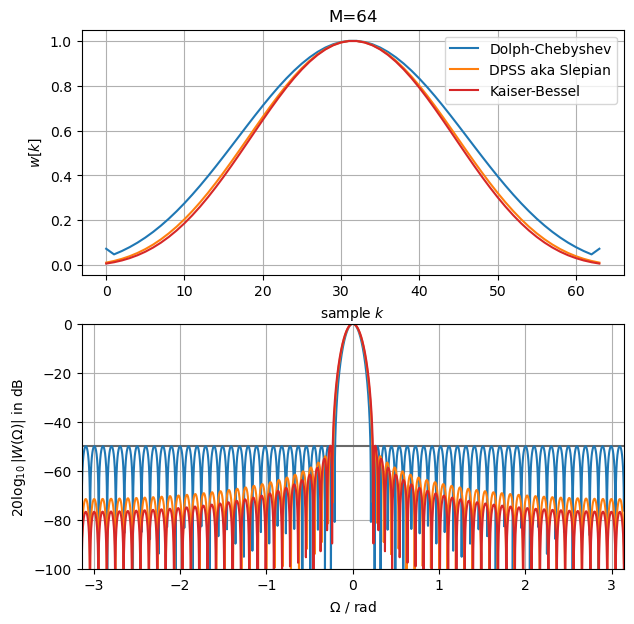

In [10]:
# check for increasing integer L
# how Slepian and the Kaiser-Bessel approximation converge, but never are exactly the same
L = 1

M = np.int(2**6 * L)
Nz = 2**6 * M  # zeropadding of window -> quasi-cont resolution of W for DTFT
k = np.arange(M)
bw = 2*np.pi/(45*L)  # for dpss
NW = bw * M/4  # for dpss
beta = 6.85  # for kaiser
Omega = 2*np.pi/Nz * np.arange(Nz)
wdc = chebwin(M, at=50, sym=True)  # dolph-chebyshev
wslep = dpss(M, NW, sym=True)  # slepian
wkb = kaiser(M, beta, sym=True)  # kaiser-bessel

Wdc = np.zeros(Nz)
Wdc[0:M] = wdc
Wdc = fftshift(fft(Wdc))
Wdc /= np.max(np.abs(Wdc))

Wslep = np.zeros(Nz)
Wslep[0:M] = wslep
Wslep = fftshift(fft(Wslep))
Wslep /= np.max(np.abs(Wslep))

Wkb = np.zeros(Nz)
Wkb[0:M] = wkb
Wkb = fftshift(fft(Wkb))
Wkb /= np.max(np.abs(Wkb))

plt.figure(figsize=(7, 7))
plt.subplot(2, 1, 1)
plt.plot(k, wdc, label='Dolph-Chebyshev')
plt.plot(k, wslep, label='DPSS aka Slepian')
plt.plot(k, wkb, label='Kaiser-Bessel', color='C3')
plt.xlabel(r'sample $k$')
plt.ylabel(r'$w[k]$')
plt.title('M=%d' % M)
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot((-np.pi, +np.pi), (-50, -50), color='dimgray')
plt.plot(Omega-np.pi, 20*np.log10(np.abs(Wdc)))
plt.plot(Omega-np.pi, 20*np.log10(np.abs(Wslep)))
plt.plot(Omega-np.pi, 20*np.log10(np.abs(Wkb)), color='C3')
plt.ylim(-100, 0)
plt.xlim(-np.pi, +np.pi)

# zoom the main lobe:
if False:
    plt.xlim(-3*bw, +3*bw)

plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r'$20 \log_{10}|W(\Omega)|$ in dB')
plt.grid(True)

In [11]:
a = np.zeros(M)
a[0] = 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

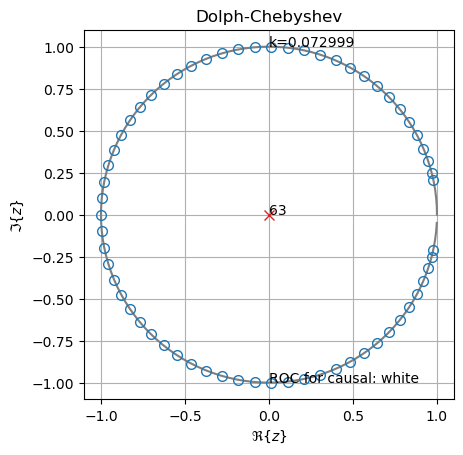

In [12]:
[z, p, gain] = tf2zpk(wdc, a)
zplane_plot(z, p, gain)
plt.title('Dolph-Chebyshev')
np.abs(z)  # all zeros on! the unit-circle == optimum design

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

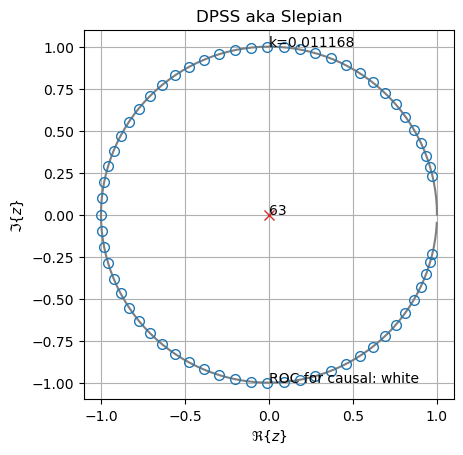

In [13]:
[z, p, gain] = tf2zpk(wslep, a)
zplane_plot(z, p, gain)
plt.title('DPSS aka Slepian')
np.abs(z)  # all zeros on! the unit-circle == optimum design

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

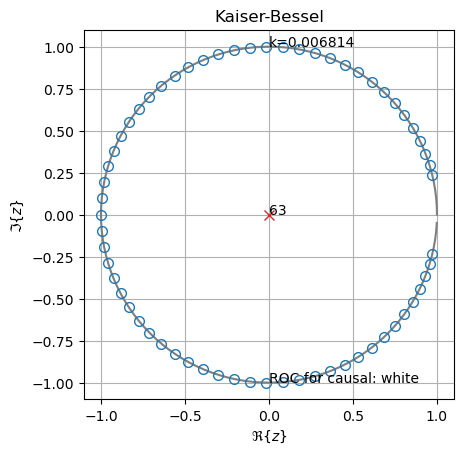

In [14]:
[z, p, gain] = tf2zpk(wkb, a)
zplane_plot(z, p, gain)
plt.title('Kaiser-Bessel')
np.abs(z)  # all zeros on! the unit-circle == optimum design

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises